# 연속형 확률 분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

연속확률분포의 성질을 확인하기 위하여 다음과 같은 함수를 생성한다. 

In [2]:
linestyles = ['-', '--', ':']


# 기대값함수
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 분산함수
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

# 확률변수가 확률의 성질을 만족하는지 확인하고 기대값과 분산을 리턴
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
# 확률변수와 구간을 입력으로 받아 확률변수의 밀도함수와 분포함수를 그래프로 표시    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

# 정규분포

대표적인 연속형 확률분포이다. 정규분포의 모수는 $\mu, \sigma^2$ 이다.

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$$


numpy를 사용하여 정규분포를 다음과 같이 생성한다.

In [3]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

$N(2, 0.5^2)$을 따르는 확률변수 X는 다음과 같다.

In [4]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
# 기대값과 분산
check_prob(X)

expected vaue 2.000
variance 0.250


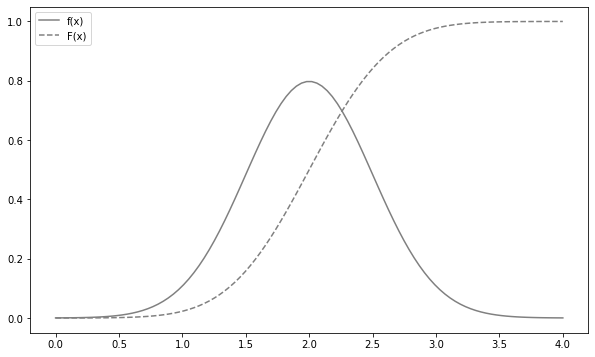

In [6]:
# 0~4 사이 구간의 밀도함수와 누적분포함수
plot_prob(X, 0, 4)

## scipy.stats로 구현하기

정규분포를 따르는 확률변수는 norm 함수로 생성할 수 있다. 첫번째 인수는 $\mu$ 두번째 인수는 표준편차$\sigma$를 지정한다. 각각 기본값이 0,1 이므로 아무것도 지정하지 않으면 표준정규분포를 따르는 확률변수를 생성한다.

In [7]:
rv = stats.norm(2, 0.5)

In [8]:
rv.mean(), rv.var() # 평균과 분산

(2.0, 0.25)

####  pdf 메소드
확률밀도함수는 pdf메소드로 계산할 수 있다.
<img src = "./images/pdf.png" width="40%">


In [9]:
rv.pdf(2) # PDF X=2 일때의 리턴값

0.7978845608028654

#### cdf 메소드, 누적분포함수
누적분포함수는 CDF 메서드로 계산할 수 있다.   
$ P(X \le x)$를 계산하는 함수이다. 

<img src = "./images/cdf.png" width="40%">

In [10]:
rv.cdf(1.7) # P(x<=1.7)

0.27425311775007355

#### ppf 메소드, percent point function 

데이터가 어떤 값 이하가 될 확률을 하측확률이라고 한다. 하측확률은 누적분포함수를 사용하여 구할 수 있다. 반대로 어떤 확률이 될 기준치를 퍼센트포인트라고 한다.  퍼센트 포인트 함수 ppf는 cdf의 역함수라고 할 수 있다. 

<img src = "./images/ppf.png" width="40%">
하측확률이 30%가 되는 지점의 퍼센트포인트는 다음과 같이 구할 수 있다. 

In [11]:
rv.ppf(0.3)

1.7377997436459796

하측확률과 퍼센트포인트는 다음과 같은 관계가 성립한다.

In [12]:
lower = stats.norm.cdf(loc=4, scale=0.8, x=3) # P(x<=3) 3이하일 확률

stats.norm.ppf(loc=4, scale=0.8, q=lower) # ppf는 cdf의 역함수, 확률이 다시 확률변수의 값으로 리턴

3.0000000000000004

#### isf 메소드, Inverse Survival function

$P(X \ge x) = \alpha$를 만족하는 x값으로 그림에서 색이 칠해진 영역의 면적이 $\alpha$일때 왼쪽 끝의 x좌표에 해당한다.
<img src = "./images/isf.png" width="40%">

In [13]:
rv.isf(0.3) # 상위 30%에 해당하는 값

2.2622002563540207

#### interval 메소드

확률이 $\alpha$가 되는 가운데 부분의 구간을 구할 수 있다.   
그림에서 색이 칠해진 영역의 면적이 alpha가 되는 a와 b의 값을 구하는 것이다. 
<img src = "./images/interval.png" width="40%">

In [14]:
rv.interval(0.9) # 90%에 해당하는 구간

(1.1775731865242636, 2.822426813475736)

오른쪽과 왼쪽에 5%씩 남아 있기 때문에 a, b의 값을 다음과 같이 구할 수도 있다.

In [15]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

stats.norm을 사용하여 모수에 따라 정규분포의 형태가 어떻게 변화하는지 살펴보자.

$\sigma^2$이 커짐에 따라 분포가 넓어지고 $\mu$가 변화하면 중심위치가 이동하는 것을 확인할 수 있다.

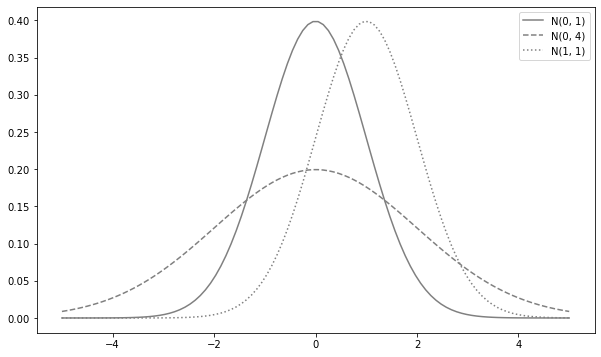

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

#### 정규 분포 예제

한 회사의 건전지 수명은 평균이 110시간, 표준편차가 10인 정규분포를 따른다고 하자.
* (1) 건전지 수명이 90시간 이하일 확률은?
* (2) 건전지 수명이 100시간 이상, 115시간 이하일 확률은?
* (3) 건전지 수명이 120시간 이상일 확률은?


In [17]:
X = stats.norm(loc=110, scale=10)

print('건전지 수명이 90시간 이하일 확률은? ', X.cdf(90))
print('건전지 수명이 100시간 이상, 115시간 이하일 확률은? ', X.cdf(115)-X.cdf(100))
print('건전지 수명이 120시간 이상일 확률은? ', 1-X.cdf(120))

건전지 수명이 90시간 이하일 확률은?  0.022750131948179195
건전지 수명이 100시간 이상, 115시간 이하일 확률은?  0.532807207342556
건전지 수명이 120시간 이상일 확률은?  0.15865525393145707


## 표준 정규 분포와 표준화

표준 정규 분포란 평균이 0 이고 분산이 1인 정규 분포를 말한다. 

정규화란 일반적인 정규분포를 표준 정규 분포로 변환하는 것을 말한다. 표준정규분포는 보통 Z 라는 기호를 사용하여 나타낸다. 

$$ Z = \dfrac{X - \mu}{\sigma} \thicksim N(0,1)$$

In [18]:
X = stats.norm(loc=50, scale=15).rvs(300)

print('평균=', X.mean(), ' 표준편차=', X.std())

평균= 48.68140058550458  표준편차= 15.805046102629051


In [19]:
Z = (X - X.mean()) / X.std()
print('평균=', Z.mean(), ' 표준편차=', Z.std())

평균= 4.588921835117314e-16  표준편차= 1.0


다음과 같은 함수를 작성하면 특정 정규 분포에서 표준화 점수(Z-score)를 확인할 수 있다. 

만약 예를 들어 한 고등학교 1학년 수학성적의 분포가 평균 50점이고 표준편차는 15점 일때 A 학생이 69점 맞았다면 표준화 점수는 1.267 이고 상위 10.264%에 해당하는 점수임을 알 수 있다. 

In [20]:
def Z(mean, std, score):
    z = (score - mean)/std
    percent = (1 - stats.norm(mean, std).cdf(score)) * 100
    return z, percent


In [21]:
Z(50, 15, 69)

(1.267, 10.263725183213579)